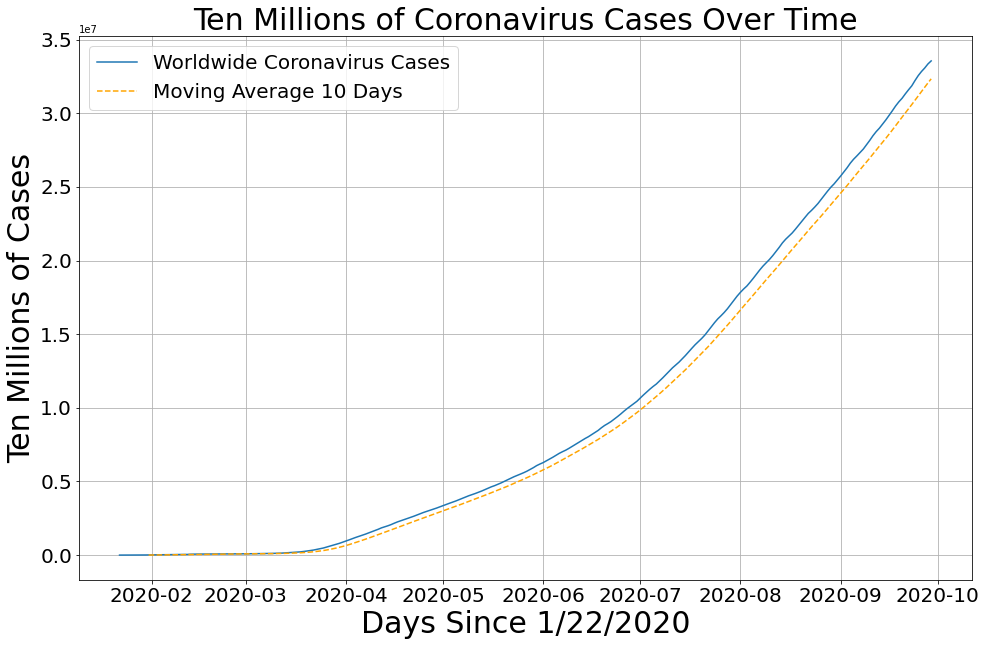

In [1]:
#plot global cases

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

covid_19_global = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
total = covid_19_global.iloc[:,4:].sum()
# print(total)
total_copy = total.index[:]
time_series = []
for time in total_copy:
    mon_s, day_s, year_s = time.split('/')
    time = datetime(int('20'+year_s), int(mon_s), int(day_s))
    time_series.append(time)
# print(B)
total.index = time_series
# print(total[total > 5000000])
# print(total[total.index == '2020-03-11'])

    
window = 10
world_confirmed_avg = pd.Series(total[:]).rolling(window=window).mean()
plt.figure(figsize=(16, 10))
plt.plot(total.index, total[:])
plt.plot(total.index, world_confirmed_avg, linestyle='dashed', color='orange')
plt.title('Ten Millions of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Ten Millions of Cases', size=30)
plt.legend(['Worldwide Coronavirus Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid()
plt.show()

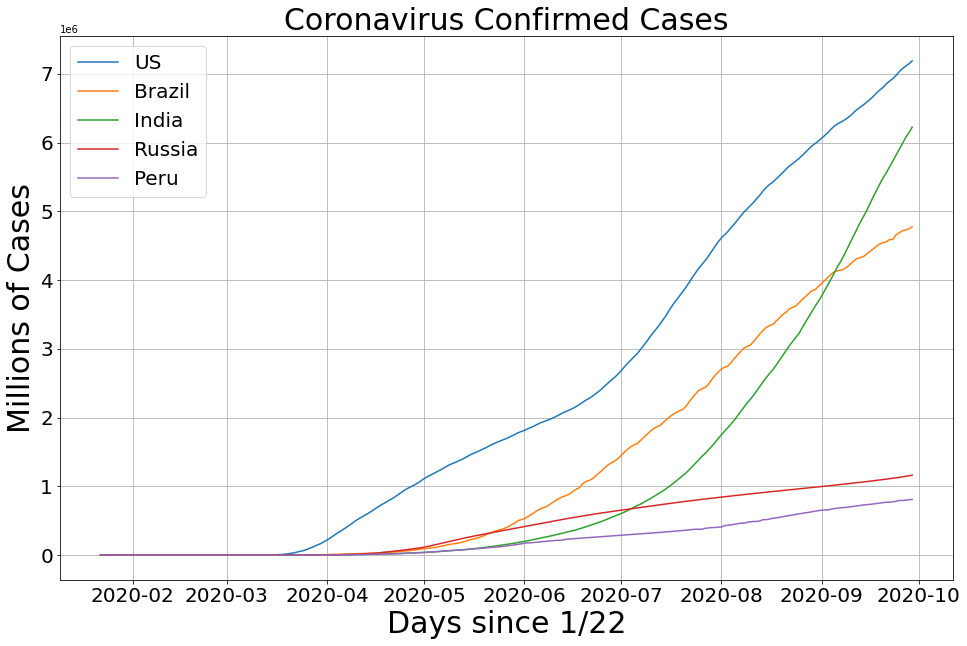

In [2]:
#plot top 5 countries' cases

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

compare_countries = ['US','Brazil','India','Russia', 'Peru'] 
covid_19_global = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

def get_country_info(country_name):
    country_cases = covid_19_global.loc[covid_19_global['Country/Region'] == country_name].iloc[:,4:].sum()
    country_cases_copy = country_cases.index[:]
    time_series = []
#     print(country_cases_copy)
    for time in country_cases_copy:
        mon_s, day_s, year_s = time.split('/')
        time = datetime(int('20'+year_s), int(mon_s), int(day_s))
        time_series.append(time)
    country_cases.index = time_series
    return country_cases


plt.figure(figsize=(16, 10))
for country in compare_countries:
    plt.plot(get_country_info(country))
#     print(get_country_info(country))
#     print(get_country_info(country).iloc[:,4:])
plt.legend(compare_countries, prop={'size': 20})
plt.xlabel('Days since 1/22', size=30)
plt.ylabel('Millions of Cases', size=30)
plt.title('Coronavirus Confirmed Cases', size=30)
plt.xticks(size=20)
# plt.yticks(['0','1M','2M','3M','4M','5M','6M'])
plt.yticks(size=20)
plt.grid()
plt.show()

12-13    3168.800049
12-16    3191.449951
12-17    3192.520020
12-18    3191.139893
12-19    3205.370117
            ...     
09-23    3236.919922
09-24    3246.590088
09-25    3298.459961
09-28    3351.600098
09-29    3335.469971
Name: close, Length: 200, dtype: float64
[22.64990234375, 1.070068359375, -1.380126953125, 14.230224609375, 15.849853515625, 2.7900390625, -0.630126953125, 16.530029296875, 0.110107421875, -18.72998046875, 9.489990234375, 27.070068359375, -23.0, 11.429931640625, -9.10009765625, 15.8701171875, 21.64990234375, -9.349853515625, 22.77978515625, -4.97998046875, 6.14013671875, 27.52001953125, 12.81005859375, -8.830078125, 0.9599609375, 3.7900390625, -30.070068359375, -51.840087890625, 32.610107421875, -2.840087890625, 10.260009765625, -58.139892578125, 23.39990234375, 48.670166015625, 37.099853515625, 11.090087890625, -18.070068359375, 24.380126953125, 5.659912109375, 21.699951171875, -5.510009765625, 6.219970703125, -9.869873046875, 15.85986328125, -12.919921875, 

Index(['12-16', '12-17', '12-18', '12-19', '12-20', '12-23', '12-24', '12-26',
       '12-27', '12-30',
       ...
       '09-16', '09-17', '09-18', '09-21', '09-22', '09-23', '09-24', '09-25',
       '09-28', '09-29'],
      dtype='object', length=199)

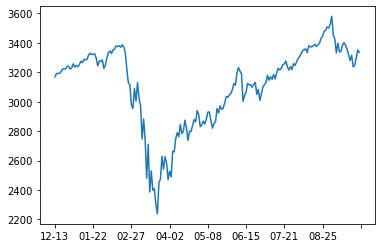

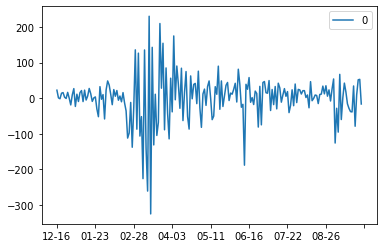

In [3]:
#web crawler for stock price

import json
import requests
import numpy as np
import pandas as pd
import matplotlib
import time

stock_name = '^GSPC'
site = "https://query1.finance.yahoo.com/v8/finance/chart/"+ stock_name +"?period1=0&period2=2009258857&interval=1d&events=history&=hP2rOschxO0"
response = requests.get(site)

data = json.loads(response.text)

new_time = list(data['chart']['result'][0]['timestamp'])
# new_time
Datetime = []
for n in new_time:
    timestamp = time.localtime(n)
    dt = time.strftime("%m-%d",timestamp)
    Datetime.append(dt)
# print(Datetime)


stock = pd.DataFrame(data['chart']['result'][0]['indicators']['quote'][0], index=Datetime )
print(stock.iloc[-200:].close)
stock.iloc[-200:].close.plot()

#Differencing
stock_var = []
for num in range(199):
    stock_var.append(stock.iloc[-200:].close.values[num+1]-stock.iloc[-200:].close.values[num])
print(stock_var)
stock_var_df = pd.DataFrame(data = stock_var, index = Datetime[-199:])
stock_var_df.plot()
stock_var_df.index

3/19/20      13643
3/20/20      20007
3/21/20      25991
3/22/20      34804
3/23/20      45973
            ...   
9/25/20    7032712
9/26/20    7078089
9/27/20    7115008
9/28/20    7148045
9/29/20    7190230
Length: 195, dtype: int64
[240, 1468, 1834, 2640, 4490, 6364, 5984, 8813, 11169, 10598, 12012, 17912, 18608, 19598, 18971, 21943, 26433, 25682, 30456, 31987, 32981, 28091, 30236, 31436, 31969, 34592, 33528, 29441, 26871, 25922, 28647, 29946, 31428, 32918, 27781, 25660, 28501, 25979, 29261, 33284, 33602, 31984, 26918, 23055, 24746, 27703, 29670, 34071, 28176, 24446, 23287, 24657, 25077, 27767, 26883, 24954, 19044, 19456, 22682, 20988, 27130, 25082, 24164, 18250, 22023, 20571, 23703, 25127, 24088, 21378, 20062, 18548, 19307, 18390, 22696, 24359, 23842, 19385, 17532, 20991, 19998, 21262, 25070, 22309, 17581, 17590, 18215, 20793, 22678, 25201, 25325, 19700, 19812, 23720, 25552, 27799, 31432, 32560, 26397, 30617, 35155, 34978, 39861, 45230, 42474, 39454, 40911, 45859, 51140, 54500, 531

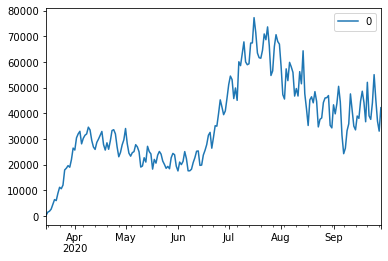

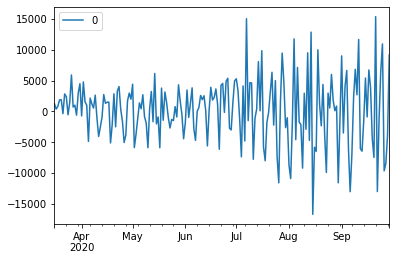

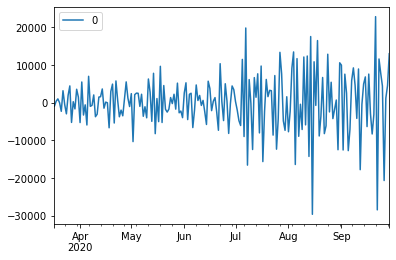

In [4]:
#Data about Covid-19

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

covid_19_global = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
total = covid_19_global.loc[covid_19_global['Country/Region'] == 'US'].iloc[:,4:].sum()
print(total[total>10000])
total_copy = total.index[:]
time_series = []
for time in total_copy:
    mon_s, day_s, year_s = time.split('/')
    time = datetime(int('20'+year_s), int(mon_s), int(day_s))
    time_series.append(time)
# print(B)
total.index = time_series
# print(total)
# print(total[total.index == '2020-03-11'])

#Daily Cases
total_cases_var = []
for num in range(199):
    total_cases_var.append(total.iloc[-200:].values[num+1] - total.iloc[-200:].values[num])
print(total_cases_var)

total_cases_var_df = pd.DataFrame(data = total_cases_var, index = time_series[-199:])
total_cases_var_df.plot()

#First Differencing
total_cases_var2 = []
for num in range(198):
    total_cases_var2.append(total_cases_var[num+1] - total_cases_var[num])
# print(total_cases_var2)

total_cases_var2_df = pd.DataFrame(data = total_cases_var2, index = time_series[-198:])
total_cases_var2_df.plot()

#Second Differencing
total_cases_var3 = []
for num in range(197):
    total_cases_var3.append(total_cases_var2[num+1] - total_cases_var2[num])
# print(max(total_cases_var3))

total_cases_var3_df = pd.DataFrame(data = total_cases_var3, index = time_series[-197:])
total_cases_var3_df.plot()
print(total_cases_var3_df)



In [5]:
#Pearson Correlation Coefficient

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import json
import requests
import time

covid_19_global = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
country_cases = covid_19_global.loc[covid_19_global['Country/Region'] == 'US'].iloc[:,4:].sum()

site = "https://query1.finance.yahoo.com/v8/finance/chart/^GSPC?period1=0&period2=2009258857&interval=1d&events=history&=hP2rOschxO0"
response = requests.get(site)
data = json.loads(response.text)
new_time = list(data['chart']['result'][0]['timestamp'])

Datetime = []
for n in new_time:
    timestamp = time.localtime(n)
    dt = time.strftime("%m-%d",timestamp)
    Datetime.append(dt)
# print(Datetime)

stock = pd.DataFrame(data['chart']['result'][0]['indicators']['quote'][0], index=Datetime)
# print(df.close)

final = {'Close': stock.close.values[-200:],
           'Cases': country_cases.values[-200:]
           }
df_final = pd.DataFrame(final)

# Pandas
final_pearson = df_final.corr()
print(final_pearson)
print(f"Pandas computed Pearson r: {final_pearson.iloc[0,1]}")

# Scipy
r, p = stats.pearsonr(df_final.dropna()['Close'], df_final.dropna()['Cases'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

          Close     Cases
Close  1.000000  0.383114
Cases  0.383114  1.000000
Pandas computed Pearson r: 0.38311353238088713
Scipy computed Pearson r: 0.38311353238088736 and p-value: 2.1535386725303524e-08


In [7]:
#Unit Root Test (ADF)

from statsmodels.tsa.stattools import adfuller
import pandas as pd

stock_ACI = []
cases_ACI = []

for i in stock_var_df.values:
    stock_ACI.append(i[0])
for i in total_cases_var3_df.values:
    cases_ACI.append(i[0])

def Adfuller(x):
    df = adfuller(x)
    dfoutput = pd.Series(df[0:4], index = ['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key, value in df[4].items():
        dfoutput['Critical Values %s'%key] = value
    return dfoutput

print(Adfuller(stock_ACI))
print(Adfuller(cases_ACI))



Test Statistic                  -3.534127
p-value                          0.007153
Lags Used                        8.000000
Number of Observations Used    190.000000
Critical Values 1%              -3.465244
Critical Values 5%              -2.876875
Critical Values 10%             -2.574945
dtype: float64
Test Statistic                -6.340273e+00
p-value                        2.765692e-08
Lags Used                      1.300000e+01
Number of Observations Used    1.830000e+02
Critical Values 1%            -3.466598e+00
Critical Values 5%            -2.877467e+00
Critical Values 10%           -2.575260e+00
dtype: float64


In [9]:
#Granger Causality Test

import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
from datetime import datetime

granger_test = {'Close': stock_var[-197:],
                'Cases': total_cases_var3
               }
# print(len(granger_test['Close']))

stock = pd.DataFrame(data = granger_test, index = total.iloc[-197:].index)
# print(stock)
# print(Cases)
print(grangercausalitytests(stock[['Close', 'Cases']], maxlag=10))


197
                Close  Cases
2020-03-17  -1.380127   -862
2020-03-18  14.230225    440
2020-03-19  15.849854   1044
2020-03-20   2.790039     24
2020-03-21  -0.630127  -2254
...               ...    ...
2020-09-25 -78.650146   4464
2020-09-26   9.670166 -20621
2020-09-27  51.869873   1219
2020-09-28  53.140137   4576
2020-09-29 -16.130127  13030

[197 rows x 2 columns]

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7744  , p=0.1844  , df_denom=193, df_num=1
ssr based chi2 test:   chi2=1.8020  , p=0.1795  , df=1
likelihood ratio test: chi2=1.7938  , p=0.1805  , df=1
parameter F test:         F=1.7744  , p=0.1844  , df_denom=193, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9434  , p=0.1461  , df_denom=190, df_num=2
ssr based chi2 test:   chi2=3.9891  , p=0.1361  , df=2
likelihood ratio test: chi2=3.9488  , p=0.1388  , df=2
parameter F test:         F=1.9434  , p=0.1461  , df_denom=190, df_num=2

Granger Causality
n